# Chapter 04 - Classification

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as stats
import statsmodels.formula.api as smf

colors = plt.cycler(color=["#557A95",   "#957055", "#559570"]) 
sns.set_context('paper', font_scale=1.4)
plt.rcParams['figure.figsize'] = [9,6]
plt.rcParams['savefig.dpi'] = 300
plt.rc("legend", frameon=False)
plt.rc("axes.spines", top=False, right=False)
plt.rcParams['axes.prop_cycle'] = colors
mycolors = colors.by_key()["color"]

In [2]:
# Modules for interactivity
from ipywidgets import interact
import ipywidgets as widgets

In [3]:
# Modules for prediction
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score

## Logistic regression

### Concept

#### Creating fake data

In [4]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

In [5]:
n = 100
x = np.linspace(-2,2, num=n) # make x data
eps = stats.norm().rvs(n)*2 # create randomness
b0, b1 = 0, 7
y = sigmoid(b0 + b1*x + eps)
ytrue = np.where(y>0.5,1,0)

#### Finding right parameters (i.e. fitting the model)

In [6]:
model = smf.ols("y ~ x", data=pd.DataFrame({"x":x, "y":ytrue})).fit()
b0_opt, b1_opt = model.params

model = smf.logit("y ~ x", data=pd.DataFrame({"x":x, "y":ytrue})).fit(method='bfgs')
b0_opt_logit, b1_opt_logit = model.params

Optimization terminated successfully.
         Current function value: 0.035896
         Iterations: 24
         Function evaluations: 25
         Gradient evaluations: 25


In [7]:
btn = widgets.Checkbox(description="Show Linear Regression")
btn2 = widgets.Checkbox(description="Show optimal logit model")
b0 = widgets.FloatSlider(value=0, min=-15,max=15)
b1 = widgets.FloatSlider(value=0, min=-15,max=15)
def logreg(b0,b1, btn, btn2):
    
    # Show logistic regression output
    fig, ax = plt.subplots(figsize=(12,7))
    sns.scatterplot(x=x, y=ytrue)
    ax.hlines(0.5, xmin=min(x), xmax=max(x), ls="--", alpha=0.3)
    plt.xlabel("x")
    plt.ylabel("y")
    alpha = 0 if b0==b1==0 else 1
    #z = b0_opt + b1_opt * x
    
    yhat = sigmoid(b0 + b1 * x)
    sns.lineplot(x=x, y=yhat, color="red", alpha=alpha,lw=3)
    
    
    ax.set_ylim((-0.5,1.5))
    ax.set_yticks([0, 0.5, 1])
    plt.suptitle("Relation y and X")
    sns.despine()

    ax.annotate(f"$y = \dfrac{{1}}{{1+e^{{-( {{{b0}}} + {{{b1}}} \cdot x )}}   }}$", xy=(-2,1.5), ha="left", color="red")
    
    # Accuracy: Current model
    yhat_binary = np.where(yhat > 0.5, 1, 0)
    acc = accuracy_score(ytrue, yhat_binary)
    ax.annotate(f"Accuracy (curr. logistic): {acc}", xy=(2, -0.3), alpha=alpha, ha="right", color="red")
    
    
    
    
    # Show linear regression output
    if btn:
        z2 = b0_opt + b1_opt * x        
        sns.lineplot(x=x, y=z2, color="black", alpha=0.1,  lw=1,)
        ax.annotate(f"$y = {{{np.round(b0_opt,2)}}} + {{{np.round(b1_opt,2)}}} \cdot x }}   }}$", xy=(-2,1.3), ha="left", color="black", alpha=0.2)
        
    if btn2:
         # Accuracy: Best model
        yhat = sigmoid(b0_opt_logit + b1_opt_logit * x)
        ax.annotate(f"$y = \dfrac{{1}}{{1+e^{{-( {{{np.round(b0_opt_logit,2)}}} + {{{np.round(b1_opt_logit,2)}}} \cdot x )}}   }}$", xy=(-2,1.1), ha="left", color="black")
        sns.lineplot(x=x, y=yhat, color="black", alpha=0.2,lw=1, ls="--")

        yhat_binary = np.where(yhat > 0.5, 1, 0)
        acc = accuracy_score(ytrue, yhat_binary)
        ax.annotate(f"Accuracy (best logistic): {acc}", xy=(2, -0.4), alpha=0.2, ha="right", color="black")
        
    
grid = widgets.GridspecLayout(10,6)
grid[0,0:] = widgets.HBox([b0,b1])
grid[1,0:] = widgets.HBox([btn, btn2])
grid[2:10,:] = widgets.interactive_output(logreg, {"b0":b0, "b1": b1, "btn":btn, "btn2":btn2})
grid

GridspecLayout(children=(HBox(children=(FloatSlider(value=0.0, max=15.0, min=-15.0), FloatSlider(value=0.0, ma…

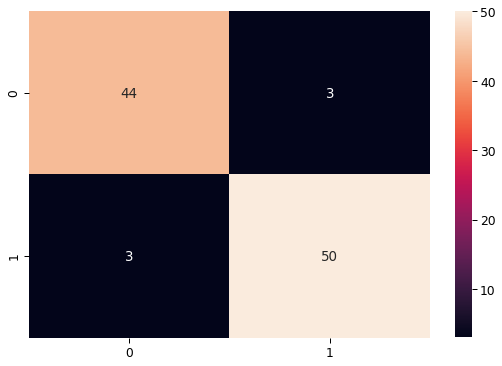

In [297]:
cm = model.pred_table()
sns.heatmap(cm, annot=True)

## Model formulation

Text(0.5, 1.0, 'Regression problem')

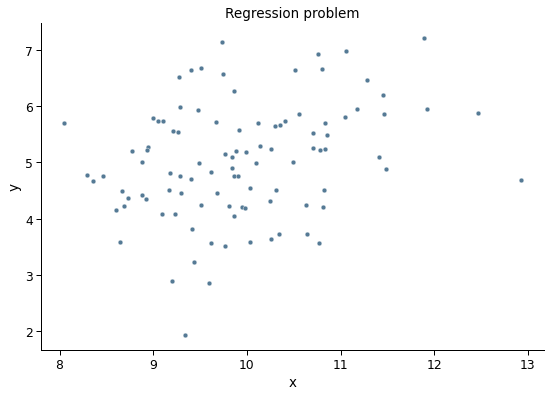

In [38]:
n = 100
x = np.random.multivariate_normal([10,5],[[1,0.4],[0.4,1]],size=n)

sns.scatterplot(x=x[:,0], y=x[:,1])
plt.xlabel("x")
plt.ylabel("y")
plt.title("Regression problem")

plt.savefig()